# Importing the Dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


# Dataset uploading and Pre-Processing

In [7]:
calories = pd.read_csv('D:\Projects\Calories Burnt Prediction/calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
exercise = pd.read_csv('D:\Projects\Calories Burnt Prediction/exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining both DataFrames

In [9]:
calories_data = pd.concat([exercise, calories['Calories']], axis = 1)

In [10]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Checking dataset information

In [11]:
calories_data.shape

(15000, 9)

In [12]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Checking for missing values

In [13]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data Analysis 

In [46]:
#Getting the Statisitic Measures of the Dataset
calories_data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualization

In [15]:
sns.set()

C:\Users\Jomon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

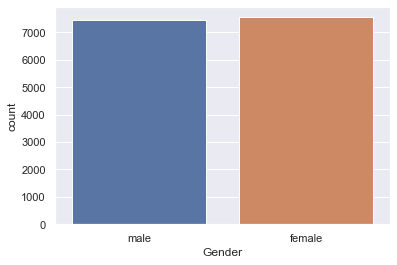

In [16]:
#Plotting the "Gender" column in countplot since its has categorial values
sns.countplot(calories_data['Gender'])

C:\Users\Jomon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

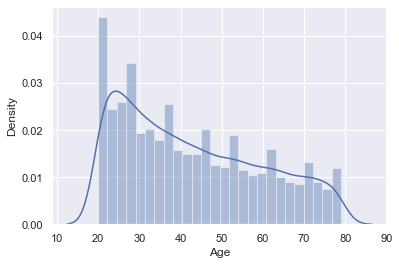

In [17]:
#Plotting the distribution of "Age" column
sns.distplot(calories_data['Age'])

C:\Users\Jomon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

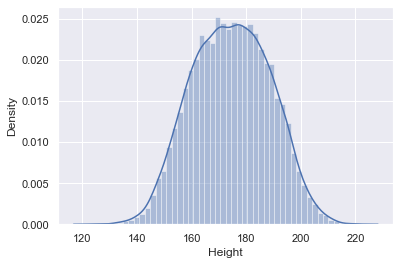

In [18]:
#Plotting the distribution of "Height" column
sns.distplot(calories_data['Height'])

C:\Users\Jomon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

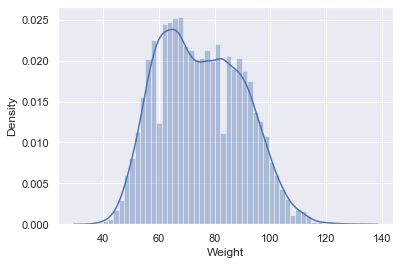

In [19]:
#Plotting the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

C:\Users\Jomon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

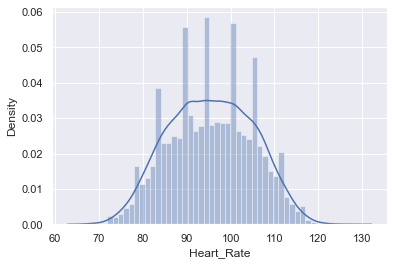

In [20]:
#Plotting the distribution of "Heart_Rate" column
sns.distplot(calories_data['Heart_Rate'])

# Finding Correlation in the Dataset
1. Positive Correlation
2. Negative Correlation

<AxesSubplot:>

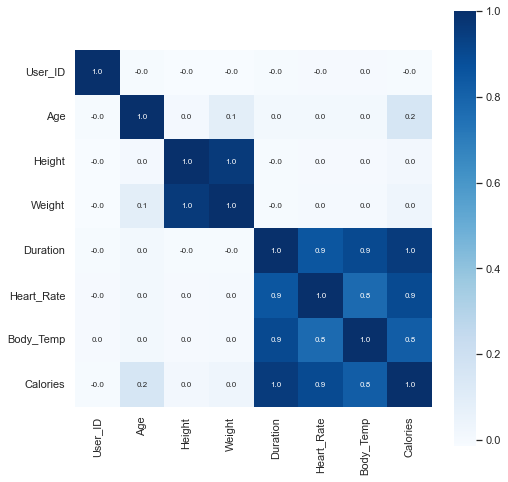

In [21]:
Correlation = calories_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(Correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# Model Building


Converting the Categorical values to numerical  


In [22]:
calories_data.replace({"Gender":{'male':0, 'female':1}}, inplace=True)
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


Separating the features and target columns


In [23]:
X = calories_data.drop(['User_ID','Calories'], axis =1 )
y = calories_data['Calories']

In [24]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [25]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training and testing data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
X_test

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
7592,1,41,172.0,74.0,24.0,98.0,40.8
3551,0,70,189.0,96.0,24.0,113.0,40.9
9698,1,53,173.0,68.0,7.0,96.0,39.3
3759,0,36,191.0,96.0,2.0,82.0,38.4
2353,1,46,169.0,68.0,20.0,111.0,40.6
...,...,...,...,...,...,...,...
8859,1,20,161.0,60.0,29.0,107.0,40.3
2886,1,40,152.0,49.0,11.0,87.0,39.8
14357,1,57,160.0,62.0,23.0,103.0,40.2
9430,1,58,171.0,67.0,6.0,82.0,39.4


In [28]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# Training and Evaluation of the models
1. XGBoost Regressor
2. Linear Regression

1. XGBoost Regressor

In [29]:
#Loading the Model
model = XGBRegressor()

In [30]:
#Training the model with X_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation of model based on XGB Regressor model

In [31]:
test_data_prediction = model.predict(X_test)

In [32]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


In [33]:
mae = metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean Absolute Error is ", mae)

Mean Absolute Error is  1.4807048829992613


In [34]:
r2 = metrics.r2_score(y_test,test_data_prediction)
print("R2_Score is", r2)

R2_Score is 0.9988455491362879


2. Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
LRM = LinearRegression()

In [37]:
LRM.fit(X_train, y_train)

LinearRegression()

Evaluation of model based on Linear Regression model

In [38]:
LRM_test_data_prediction = LRM.predict(X_test)

In [39]:
mae = metrics.mean_absolute_error(y_test, LRM_test_data_prediction)
print("Mean Absolute Error for Linear Regression is  ", mae)

Mean Absolute Error for Linear Regression is   8.385188053147187


In [40]:
r2 = metrics.r2_score(y_test,LRM_test_data_prediction)
print("R2_Score for Linear Regression is", r2)

R2_Score for Linear Regression is 0.9668790377181355


In [44]:
input_data=(0,68,190.0,94.0,29.0,105.0,40.8)
numpyArray=np.asarray(input_data)
reshapedArray=numpyArray.reshape(1,-1)
test_data_prediction=model.predict(reshapedArray)

In [45]:
print(test_data_prediction)

[230.88486]


In [42]:
import pickle

In [ ]:
filename='calorie_burnt.sav'
pickle.dump(model, open(filename, 'wb'))